## Advanced Regression


- Define a multiple regression task, i.e., using more than one input feature, and solve it using 2 advanced regression approaches (not linear).
- Compare and evaluate the approaches using appropriate metrics.

# Import

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
#from scikitplot.metrics import plot_roc

from collections import defaultdict
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error


# Prep Data

load, prep e split



In [15]:
#caricare df

#df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df = pd.read_csv(r'Data/Processed/final_df_standard_scaler_box_cox.csv') 
df.shape

(88554, 24)

In [16]:
df.head()

,Unnamed: 0,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,0,-0.680781,0.162759,1.978201,-1.033140,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,...,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,german,Sad
1,1,0.940114,0.812539,-1.691805,-0.475462,0.208828,-0.452776,0.240034,-0.532243,-0.511836,...,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,club,Angry
2,2,2.862979,-1.461689,0.695703,-0.302661,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,...,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,minimal-techno,Angry
3,3,-0.386216,1.415905,0.655625,0.522074,0.954063,0.919465,-0.792551,-0.532243,-0.689672,...,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,hip-hop,Happy
4,4,1.023124,-0.533433,-0.260445,-0.809283,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,...,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,minimal-techno,Sad


In [17]:
categoriche_da_trasformare = [ 'explicit', 'genre']

# Applica il LabelEncoder a ciascuna colonna categorica
label_encoder = LabelEncoder()
for col in categoriche_da_trasformare:
    df[col] = label_encoder.fit_transform(df[col])



In [18]:
df = df.drop(columns=['Unnamed: 0', 'valence', 'energy'])

In [19]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['mood'] = label_encoder.fit_transform(df['mood'])
df

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,...,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,-0.680781,0.162759,1.978201,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,-0.618882,0.433548,...,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,39,3
1,0.940114,0.812539,-1.691805,0.208828,-0.452776,0.240034,-0.532243,-0.511836,1.878636,-1.384628,...,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,17,0
2,2.862979,-1.461689,0.695703,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,-0.081356,1.276279,...,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,73,0
3,-0.386216,1.415905,0.655625,0.954063,0.919465,-0.792551,-0.532243,-0.689672,1.324332,-1.142426,...,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,51,1
4,1.023124,-0.533433,-0.260445,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,0.254670,0.579533,...,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,0.962328,1.508731,1.153738,-0.590779,-0.490347,1.107203,-0.527803,-0.305649,-0.081524,0.957767,...,0.055934,0.200625,0.852280,-0.113375,0,7,0,4,81,2
88550,-1.191927,-0.022892,-0.203191,-4.644748,-0.255080,1.992191,2.445458,-0.642765,-1.338099,-0.800688,...,1.504464,2.688329,-1.033161,-0.306613,0,10,1,4,26,2
88551,0.316970,1.508731,-0.810087,-0.199843,-0.447409,1.196296,-0.532243,-0.573692,0.275053,-0.588346,...,-0.383871,0.123742,0.824139,-0.130130,0,3,1,4,70,3
88552,0.054432,1.323080,0.483862,-0.584153,-0.425045,-0.169793,2.361622,-0.612868,0.087331,1.694327,...,0.011550,-1.523744,0.205039,-0.301417,0,10,0,4,32,0


In [20]:
#One-hot o label

label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

# # Utilizzare l'encoding one-hot per la variabile 'genre'
# df = pd.get_dummies(df, columns=['genre'], prefix=['genre'], dtype=int)

df

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,...,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,-0.680781,0.162759,1.978201,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,-0.618882,0.433548,...,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,39,3
1,0.940114,0.812539,-1.691805,0.208828,-0.452776,0.240034,-0.532243,-0.511836,1.878636,-1.384628,...,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,17,0
2,2.862979,-1.461689,0.695703,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,-0.081356,1.276279,...,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,73,0
3,-0.386216,1.415905,0.655625,0.954063,0.919465,-0.792551,-0.532243,-0.689672,1.324332,-1.142426,...,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,51,1
4,1.023124,-0.533433,-0.260445,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,0.254670,0.579533,...,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,0.962328,1.508731,1.153738,-0.590779,-0.490347,1.107203,-0.527803,-0.305649,-0.081524,0.957767,...,0.055934,0.200625,0.852280,-0.113375,0,7,0,4,81,2
88550,-1.191927,-0.022892,-0.203191,-4.644748,-0.255080,1.992191,2.445458,-0.642765,-1.338099,-0.800688,...,1.504464,2.688329,-1.033161,-0.306613,0,10,1,4,26,2
88551,0.316970,1.508731,-0.810087,-0.199843,-0.447409,1.196296,-0.532243,-0.573692,0.275053,-0.588346,...,-0.383871,0.123742,0.824139,-0.130130,0,3,1,4,70,3
88552,0.054432,1.323080,0.483862,-0.584153,-0.425045,-0.169793,2.361622,-0.612868,0.087331,1.694327,...,0.011550,-1.523744,0.205039,-0.301417,0,10,0,4,32,0


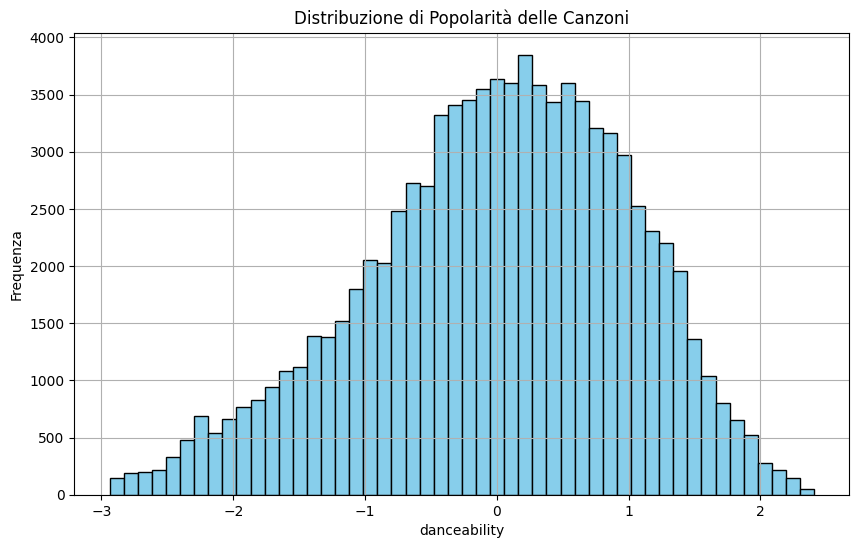

In [21]:
# Traccia la distribuzione
plt.figure(figsize=(10, 6))
plt.hist(df['danceability'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuzione di Popolarità delle Canzoni')
plt.xlabel('danceability')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [22]:
df.shape

(88554, 21)

In [23]:
#campionamento

# print(df.shape)
# df = df.sample(frac=0.2, random_state=42)
# print(df.shape)

# Partition

In [24]:
target_name = 'danceability'

In [25]:
#partitioning X e Y solo su TRAIN DATA

attributes = [col for col in df.columns if col != target_name]

X = df[attributes].values
y = np.array(df[target_name])  # oppure y = df['emotion].values

X.shape, y.shape

((88554, 20), (88554,))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70843, 20), (17711, 20), (70843,), (17711,))

prova

In [27]:
#questa sarebbe la baseline, cioè facendo semplicemente la media
y_baseline = np.full_like(y_test, np.mean(y_train)) # Calcolo della media della variabile target
mse_baseline = mean_squared_error(y_test, y_baseline)
print("MSE del modello baseline:", mse_baseline)
print('R² del modello baseline:', r2_score(y_test, y_baseline))
print("MAE del modello baseline:", mean_absolute_error(y_test, y_baseline))

MSE del modello baseline: 1.0005491021069368
R² del modello baseline: -3.781805191316323e-05
MAE del modello baseline: 0.8085117590826997


<h2>SUPPORT VECTOR REGRESSOR</h2>

In [28]:
from sklearn.svm import SVR

In [29]:
# RUN in 45 minuti con label


#POPULARITY ARTIST

param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.01, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10]
}

# cross-validation
grid_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 


# Migliori parametri:  {'kernel': 'rbf', 'epsilon': 0.1, 'C': 100} -0.42751986823841837

Migliori parametri:  {'kernel': 'rbf', 'epsilon': 0.01, 'C': 100} -0.46415798978164


In [30]:
# Fai previsioni sul set di test con il miglior modello
best_SVR_model = grid_search.best_estimator_

y_train_pred = best_SVR_model.predict(X_train)
y_test_pred = best_SVR_model.predict(X_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.5453630289273672
MSE: 0.4545754197975902
MAE 0.5338855607790172

Performance sul test set:
R²: 0.5444017343628835
MSE: 0.4558311969568244
MAE 0.5341251004137887


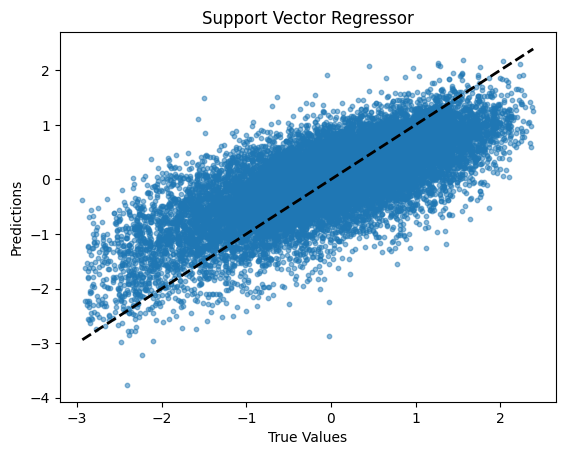

In [31]:
plt.scatter(y_test, y_test_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Support Vector Regressor")
plt.show()

<H2>GRADIENT BOOSTING REGRESSOR</H2>

In [32]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [33]:
# run in 15 minuti per 10% dataset
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_samples_split': [2,5]
} #loss squared error

# cross-validation
grid_search = RandomizedSearchCV(estimator= GradientBoostingRegressor(), param_distributions= param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 

#Migliori parametri:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2} -0.07409827119940049

Migliori parametri:  {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.2} -0.3123618658989421


In [34]:
#alleno il gradient boost regressor con i migliori parametri usciti dalla grid search

best_GBR_model = grid_search.best_estimator_

y_train_pred = best_GBR_model.predict(X_train)
y_test_pred = best_GBR_model.predict(X_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.72667803096815
MSE: 0.27328496518754897

Performance sul test set:
R²: 0.6922120072078195
MSE: 0.3079453539341311
MAE 0.4357657196044057


Performance sul training set:
R²: 0.9551038730679805
MSE: 0.044369641127987657

Performance sul test set:
R²: 0.7728352922348588
MSE: 0.22786099294922113
MAE 0.3620952080617545

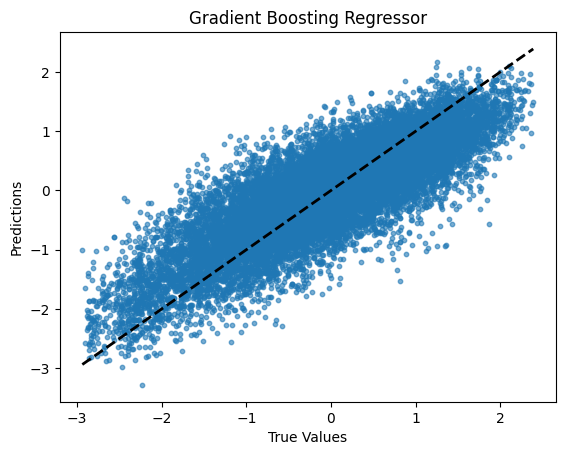

In [35]:
plt.scatter(y_test, y_test_pred, alpha=0.6, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regressor")
plt.show()

In [36]:
importances = best_GBR_model.feature_importances_

# Creare una lista di tuple (feature, importanza)
feature_importance = list(zip(attributes, importances))

# Ordinare le feature per importanza in ordine decrescente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Stampare le feature e le relative importanze
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

tempo_confidence: 0.26693066527783355
time_signature_confidence: 0.14108873881029493
acousticness: 0.10236242311009051
tempo: 0.08505302631618646
speechiness: 0.07934142352165874
instrumentalness: 0.06970520218207243
genre: 0.06593341274815075
mood: 0.06342869861501717
loudness: 0.035373671918494
liveness: 0.02414707551479212
duration_ms: 0.023499612367797552
followers_artist: 0.007895890484666568
time_signature: 0.007814353404985267
explicit: 0.007744556874028228
popularity_artist: 0.007572166430739114
popularity: 0.006511560981582188
mode_confidence: 0.002687157100518818
key_confidence: 0.0012901500534386893
key: 0.0011301976958200577
mode: 0.00049001659183286


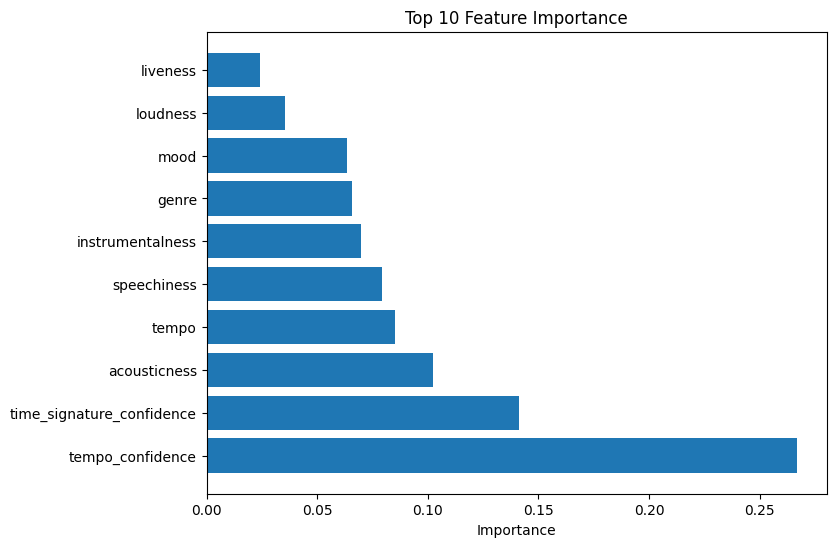

In [37]:

# Estrai le prime 10 feature e le importanze
features, importances = zip(*feature_importance[:10])

# Crea un grafico a barre delle importanze delle feature
plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

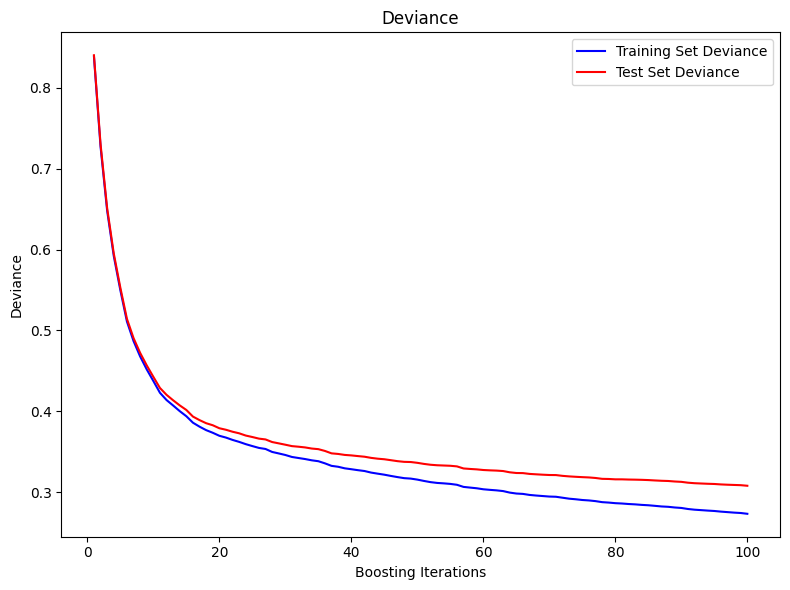

In [38]:
params = grid_search.best_params_

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(best_GBR_model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    best_GBR_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## random forest regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
#RUN in per 10% del dataset

from sklearn.model_selection import RandomizedSearchCV

# Definisci il modello Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Definisci l'insieme dei parametri da ottimizzare
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # numero di alberi nella foresta
    'max_depth': [ 10, 20],  # profondità massima degli alberi
    'min_samples_split': [2, 5, 10],  # numero minimo di campioni richiesti per suddividere un nodo
    'min_samples_leaf': [1, 2, 4],  # numero minimo di campioni richiesti in una foglia
}

# Esegui la ricerca casuale
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)

# Addestra il modello con la ricerca casuale
random_search.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Best parameters found:")
print(random_search.best_params_)



/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [41]:
# Fai previsioni sul set di test con il miglior modello
best_rf_model = random_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)


# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.9238048537922625
MSE: 0.07618483048618481

Performance sul test set:
R²: 0.6765823819970906
MSE: 0.3235829700208167
MAE 0.4336867680432656


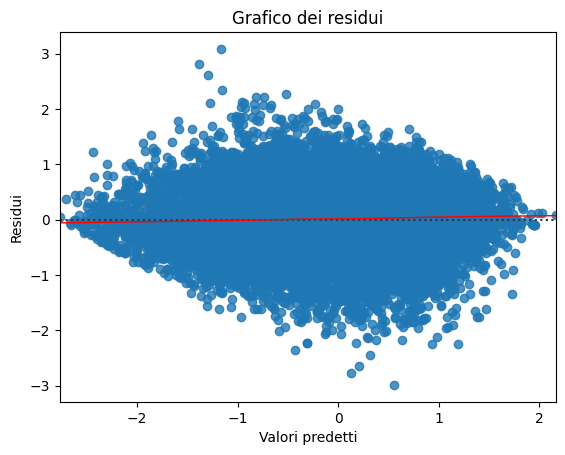

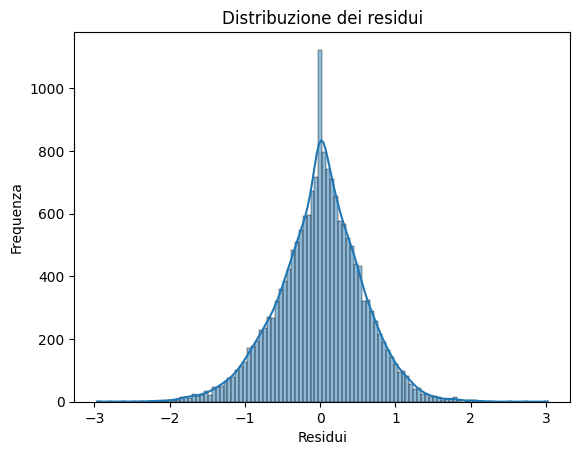

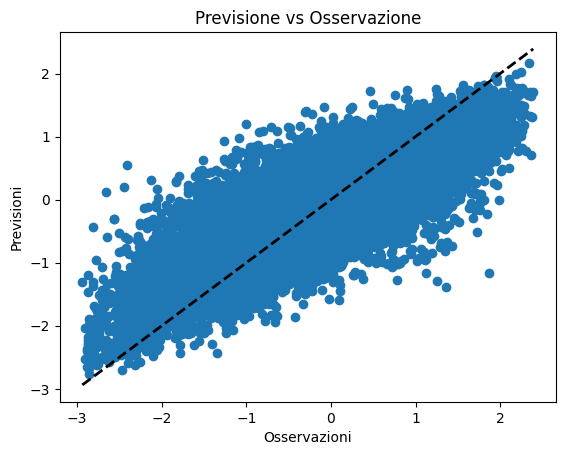

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico dei residui
residuals = y_test - y_test_pred

sns.residplot(x= y_test_pred, y= residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Valori predetti')
plt.ylabel('Residui')
plt.title('Grafico dei residui')
plt.show()

# Grafico della distribuzione dei residui
sns.histplot(residuals, kde=True)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei residui')
plt.show()

# Grafico di previsione vs osservazione
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Osservazioni')
plt.ylabel('Previsioni')
plt.title('Previsione vs Osservazione')
plt.show()


RISULTATI